# The Dyna Architecture
Based on [Sutton (1991)](https://pdfs.semanticscholar.org/47b4/987a82c4380e2c27e52603b5aaabe7cea59f.pdf): *Dyna, an Integrated Architecture for Learning, Planning, and Reacting*.

## Introduction to Dyna
The Dyna architecture attempts to integrate: (1) trial-and-error learning of reactive policies, i.e. mapping from situations to actions; (2) learning domain knowledge, i.e. mapping from a current situation to the next via an action; (3) planning, i.e. finding the optimal policy given this knowledge; and (4) reactive execution, i.e. no planning between perceiving a situation and responding to it.

The architecture assumes the problem an agent faces is one of reward maximization. The crux of Dyna is that planning boils down to "trying things in your head", or using an internal model to simulate the expected reward from a state-action policy. 

## Dyna Algorithm

In pseudocode, the Dyna algorithm is:

1. Observe the state of the world, reactively choose an action in response.
2. Observe subsequent reward and new state.
3. Update values based on this experience.
4. Update action model based on this experience.
5. Repeat $K$ times:
    - Select hypothetical world state and action.
    - Predict subsequent reward and new state.
    - Update values based on this experience.
    
This fifth step is the planning portion of the algorithm, instantiated essentially as reinforcement learning from hypothetical model-generated experiences. It is important to note that Dyna is neutral to how hypothetical world states are selected. This makes Dyna general-purpose if not frustrating.

## Q-Learning
For step (3), the proposal is to use *Q-learning* as the evaluation function of actions. In Q-learning, the value of a state is updated for a state $S$ and action $A$ such that:

> $ Q(S,A) \leftarrow Q(S,A) + \alpha[R + \gamma \cdot max \ Q(S',a)-Q(S,A)]$

where $R$ is the observed reward; $\alpha$ is a learning parameter; and $\gamma$ is a discount parameter.

## Example 1: Running Mazes

(11, 11)
(11, 11)
(11, 11)
(11, 11)
(11, 11)
(11, 11)


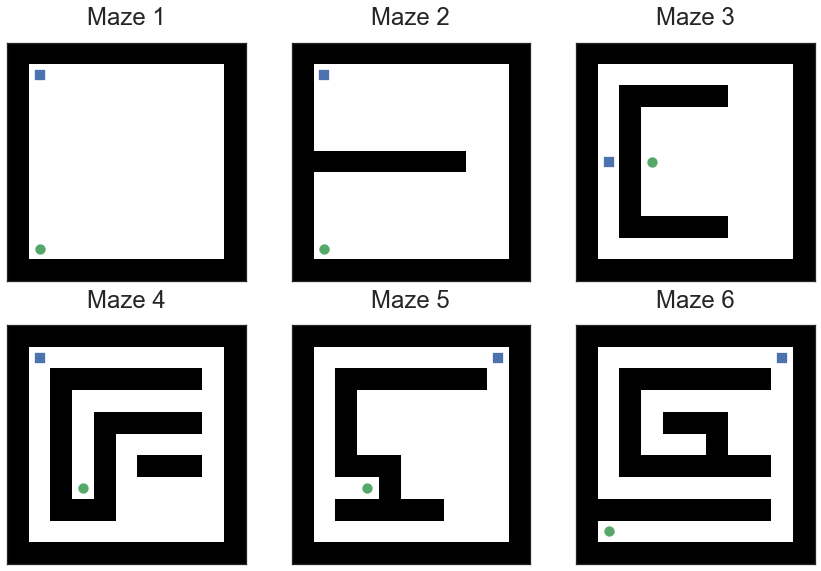

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from maze import *
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot mazes.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(2,3,figsize=(12,8))

## Iteratively plot mazes.
for i in range(6):
    
    ## Load maze.
    maze, start, end = MazeGenerator(i+1)
    print(maze.shape)
    
    ## Plot.
    axes[i//3,i%3].matshow(maze, cmap='bone')
    axes[i//3,i%3].scatter(*start[::-1], s=100, marker='s')
    axes[i//3,i%3].scatter(*end[::-1], s=100)
    axes[i//3,i%3].set(xticks=[], yticks=[], title='Maze %s' %(i+1))
    
plt.tight_layout()